<a href="https://colab.research.google.com/github/dimasw09/BelajarKoding/blob/main/PrediksiKelulusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


dataset_url = ('https://raw.githubusercontent.com/dimasw09/BelajarKoding/main/Dataset1.csv')

d = pd.read_csv(dataset_url)
d.head()

,Tahun Masuk,IPK,SKS,Status Kelulusan
0,2006,3,96,2
1,2008,3,98,0
2,2008,3,100,0
3,2008,3,100,0
4,2008,3,98,0


In [3]:
d.columns

Index(['Tahun Masuk', 'IPK', 'SKS', 'Status Kelulusan'], dtype='object')

In [6]:
x=d.iloc[:,0:-1]
y=d.iloc[:,2].values
print(x.shape)

(681, 3)


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
y = sc.fit_transform(y.reshape(-1,1))

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=4,activation='relu'))
model.add(tf.keras.layers.Dense(units=9,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(x,y.reshape(-1,1),epochs=100,batch_size=30)

# model.summary()

Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 0.7616
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7401
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.7180
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6968
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6777
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6599
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6431
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6273
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6110
Epoch 10/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5965
Epoch 11/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5830
Epoch 12/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5703
Epoch 13/100
23/23 [=================

In [11]:
ypredict=model.predict(x)
print(ypredict)

22/22 [==============================] - 0s 1ms/step
[[2.03990215e-03]
 [1.01240501e-02]
 [1.56836659e-02]
 [1.56836659e-02]
 [1.01240501e-02]
 [1.35736843e-03]
 [2.14081965e-02]
 [2.11276766e-03]
 [2.14081965e-02]
 [2.14081965e-02]
 [2.14081965e-02]
 [1.80545822e-02]
 [4.47015464e-02]
 [1.80545822e-02]
 [1.80545822e-02]
 [4.47015464e-02]
 [3.78400870e-02]
 [9.55407586e-07]
 [9.61016491e-03]
 [9.76246520e-06]
 [9.61016491e-03]
 [4.09406464e-04]
 [1.47938030e-04]
 [2.40594987e-02]
 [9.61016491e-03]
 [2.86069065e-02]
 [1.27094995e-06]
 [3.19965705e-02]
 [1.02046523e-02]
 [1.02046523e-02]
 [3.19965631e-02]
 [1.02046523e-02]
 [1.02046523e-02]
 [4.73806256e-04]
 [1.02046523e-02]
 [1.02046523e-02]
 [2.05308665e-02]
 [1.02046523e-02]
 [1.02046523e-02]
 [1.02046523e-02]
 [5.00899553e-02]
 [4.73806256e-04]
 [1.85994338e-02]
 [1.85994338e-02]
 [3.19965705e-02]
 [3.19965705e-02]
 [2.22950959e-07]
 [1.06538720e-02]
 [1.06538720e-02]
 [3.07993386e-02]
 [1.20494189e-02]
 [7.55656511e-03]
 [2.7611088

In [12]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ypredict,y)
print(mae)

0.35859578850060075


<Figure size 432x288 with 0 Axes>

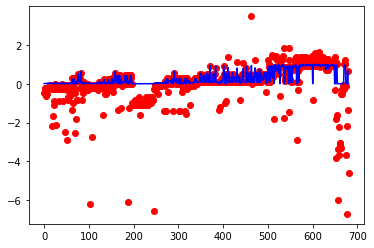

<Figure size 432x288 with 0 Axes>

In [20]:
a=range(len(x))
plt.scatter(a,y, color='red')
plt.plot(a,ypredict, color='blue')
# plt.plot(x,ypredict)
plt.figure()